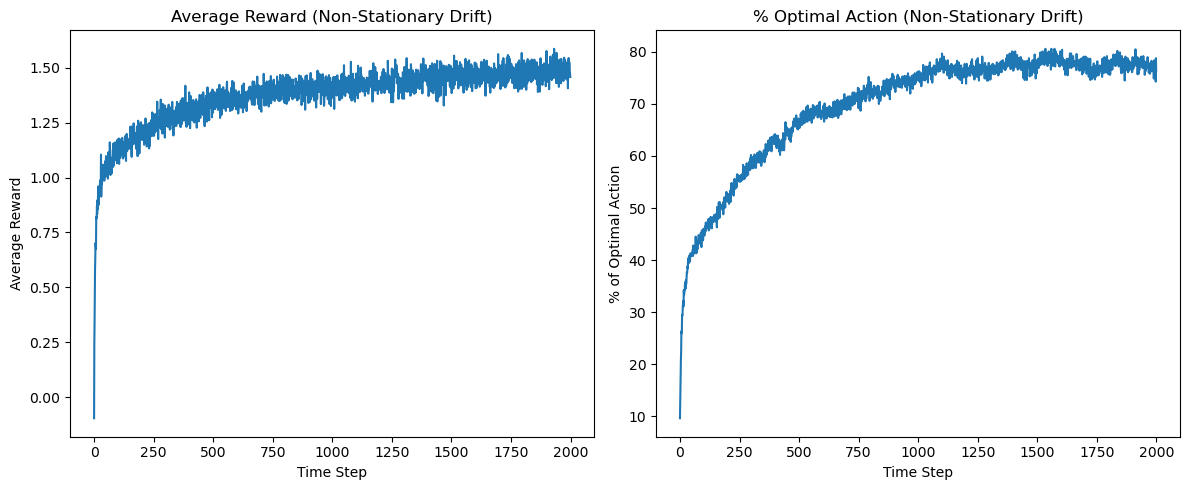

In [2]:
# Re-import necessary libraries
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Non-stationary environment with drift
class NonStationaryDriftBandit:
    def __init__(self, k=10, drift_std=0.01):
        self.k = k
        self.drift_std = drift_std
        self.means = np.random.normal(0, 1, k)

    def pull(self, action):
        reward = np.random.normal(self.means[action], 1)
        self._drift()
        return reward

    def _drift(self):
        self.means += np.random.normal(0, self.drift_std, self.k)

    def get_optimal_action(self):
        return np.argmax(self.means)

# Step 2: ε-Greedy Agent with constant α
class EpsilonGreedyConstantAlphaAgent:
    def __init__(self, k, epsilon=0.1, alpha=0.1):
        self.k = k
        self.epsilon = epsilon
        self.alpha = alpha
        self.q_values = np.zeros(k)

    def select_action(self):
        if np.random.rand() < self.epsilon:
            return np.random.randint(self.k)
        else:
            max_q = np.max(self.q_values)
            best_actions = np.where(self.q_values == max_q)[0]
            return np.random.choice(best_actions)

    def update(self, action, reward):
        self.q_values[action] += self.alpha * (reward - self.q_values[action])

# Step 3: Simulation
def simulate_nonstationary(agent_class, env_class, runs=1000, time_steps=2000, k=10):
    avg_rewards = np.zeros(time_steps)
    optimal_action_counts = np.zeros(time_steps)

    for run in range(runs):
        np.random.seed(run)
        env = env_class(k)
        agent = agent_class(k)

        for t in range(time_steps):
            optimal_action = env.get_optimal_action()
            action = agent.select_action()
            reward = env.pull(action)
            agent.update(action, reward)

            avg_rewards[t] += reward
            if action == optimal_action:
                optimal_action_counts[t] += 1

    avg_rewards /= runs
    optimal_action_counts = (optimal_action_counts / runs) * 100
    return avg_rewards, optimal_action_counts

# Run simulation for drift-based non-stationary bandit
rewards_drift, optimal_drift = simulate_nonstationary(
    agent_class=lambda k: EpsilonGreedyConstantAlphaAgent(k, epsilon=0.1, alpha=0.1),
    env_class=NonStationaryDriftBandit
)

# Plotting results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rewards_drift)
plt.title("Average Reward (Non-Stationary Drift)")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")

plt.subplot(1, 2, 2)
plt.plot(optimal_drift)
plt.title("% Optimal Action (Non-Stationary Drift)")
plt.xlabel("Time Step")
plt.ylabel("% of Optimal Action")

plt.tight_layout()
plt.show()


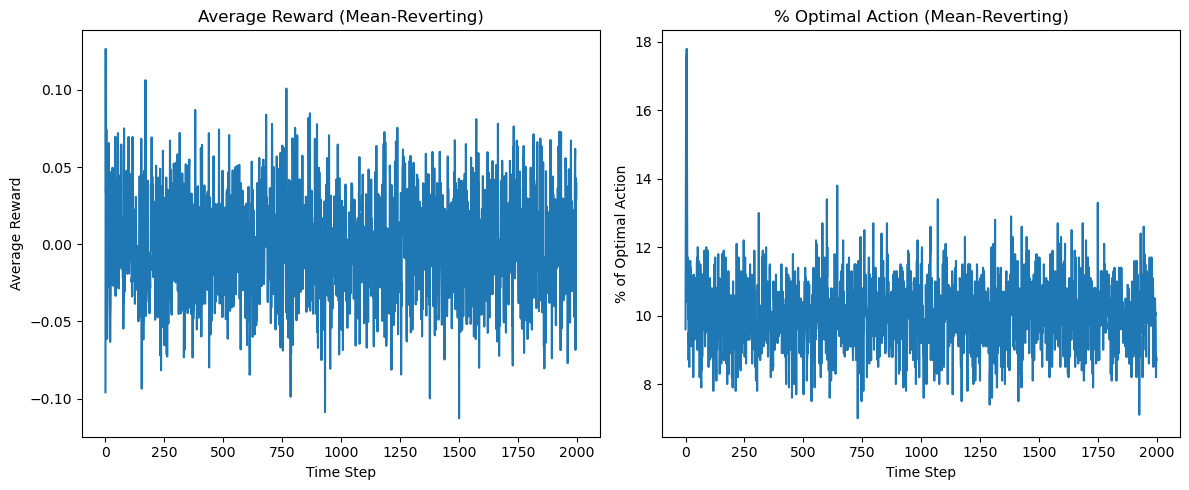

In [3]:
# Step 1: Non-stationary environment with mean-reverting update
class NonStationaryMeanRevertingBandit:
    def __init__(self, k=10, kappa=0.5, noise_std=0.01):
        self.k = k
        self.kappa = kappa
        self.noise_std = noise_std
        self.means = np.random.normal(0, 1, k)

    def pull(self, action):
        reward = np.random.normal(self.means[action], 1)
        self._mean_revert()
        return reward

    def _mean_revert(self):
        noise = np.random.normal(0, self.noise_std, self.k)
        self.means = self.kappa * self.means + noise

    def get_optimal_action(self):
        return np.argmax(self.means)

# Reuse: ε-Greedy Agent with constant α (already defined in earlier code)

# Step 2: Simulate mean-reverting bandit
rewards_mean_revert, optimal_mean_revert = simulate_nonstationary(
    agent_class=lambda k: EpsilonGreedyConstantAlphaAgent(k, epsilon=0.1, alpha=0.1),
    env_class=NonStationaryMeanRevertingBandit
)

# Step 3: Plot results
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(rewards_mean_revert)
plt.title("Average Reward (Mean-Reverting)")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")

plt.subplot(1, 2, 2)
plt.plot(optimal_mean_revert)
plt.title("% Optimal Action (Mean-Reverting)")
plt.xlabel("Time Step")
plt.ylabel("% of Optimal Action")

plt.tight_layout()
plt.show()


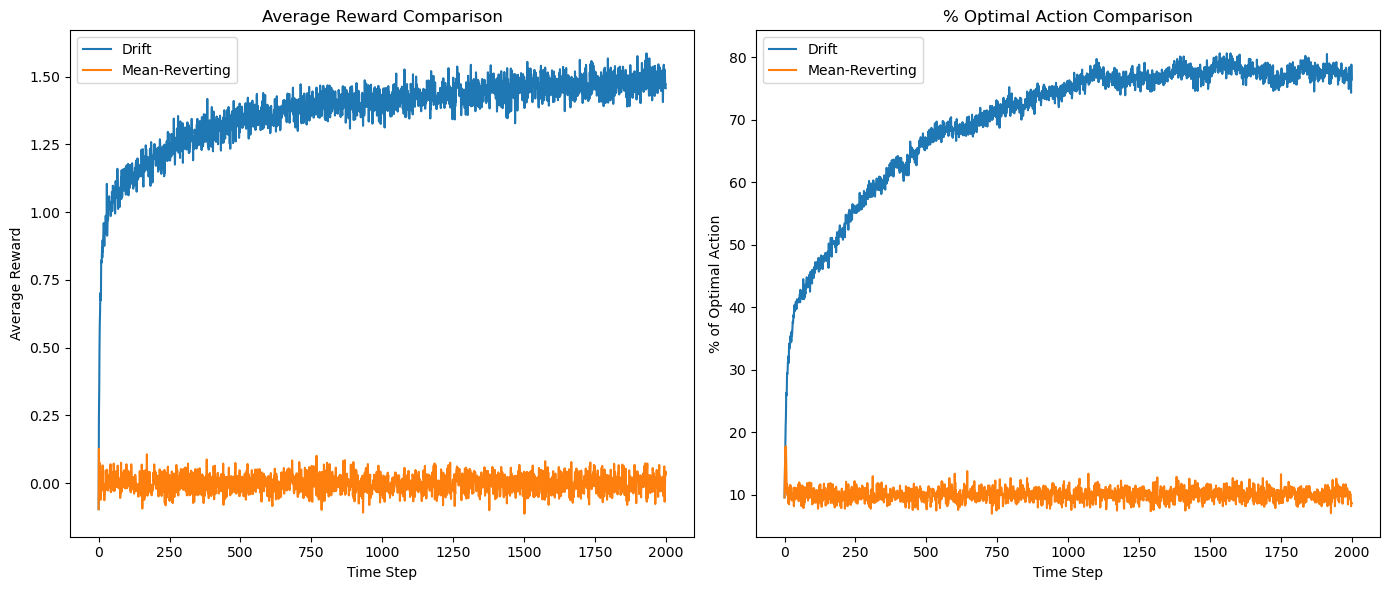

In [4]:

# Plot Drift and Mean-Reverting models side by side for comparison

plt.figure(figsize=(14, 6))

# Average Reward Comparison
plt.subplot(1, 2, 1)
plt.plot(rewards_drift, label="Drift")
plt.plot(rewards_mean_revert, label="Mean-Reverting")
plt.title("Average Reward Comparison")
plt.xlabel("Time Step")
plt.ylabel("Average Reward")
plt.legend()

# % Optimal Action Comparison
plt.subplot(1, 2, 2)
plt.plot(optimal_drift, label="Drift")
plt.plot(optimal_mean_revert, label="Mean-Reverting")
plt.title("% Optimal Action Comparison")
plt.xlabel("Time Step")
plt.ylabel("% of Optimal Action")
plt.legend()

plt.tight_layout()
plt.show()
